In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

In [151]:
col_dict = {
    'GS': int,
    'Rushing|Att': int, 'Rushing|Yds': int,'Rushing|TD': int,'Receiving|Tgt': int, 'Receiving|Rec': int, 
    'Receiving|Yds': int, 'Receiving|TD': int, 'Kick Returns|Rt': int, 'Kick Returns|Yds': int, 'Kick Returns|TD': int, 
    'Scoring|2PM': int, 'Scoring|TD': int, 'Scoring|Pts': int, 'Fumbles|Fmb': int, 'Fumbles|FL': int,
    'Off. Snaps|Num': int, 'ST Snaps|Num': int, 'Passing|Cmp': int, 'Passing|Att': int, 'Passing|Yds': int,
     'Passing|TD': int, 'Passing|Int': int, 'Passing|Sk': int, 'Punt Returns|Ret': int, 'Punt Returns|Yds': int,'Punt Returns|TD': int,
     'fantasy_points':float
}

In [152]:
player_path = r'C:\Users\Tyler\OneDrive\Documents\Concatenated Fantasy Data\All_Players.csv'

player_df = pd.read_csv(player_path)
player_df = player_df[player_df['Year'] >= 2003]
player_df = player_df.replace("*",np.NaN).fillna(0.0).astype(col_dict)




C:\Users\Tyler\AppData\Local\Temp\ipykernel_98604\3136874198.py:3: DtypeWarning: Columns (51,63,65,67,68,76,89,91) have mixed types. Specify dtype option on import or set low_memory=False.
  player_df = pd.read_csv(player_path)


In [153]:
# player_df.reset_index(inplace=True)
player_df = player_df[player_df['Position'].str.contains('|'.join(['WR','QB','TE','RB']))]

In [154]:
player_df_offense = player_df[['Rk', 'Year', 'Date', 'G#', 'Week', 'Age', 'Tm',
       'Home_Away', 'Opp', 'Result', 'GS', 'Rushing|Att',
       'Rushing|Yds', 'Rushing|Y/A', 'Rushing|TD', 'Receiving|Tgt',
       'Receiving|Rec', 'Receiving|Yds', 'Receiving|Y/R', 'Receiving|TD',
       'Receiving|Ctch%', 'Receiving|Y/Tgt', 'Kick Returns|Rt',
       'Kick Returns|Yds', 'Kick Returns|Y/Rt', 'Kick Returns|TD',
       'Scoring|2PM', 'Scoring|TD', 'Scoring|Pts', 'Fumbles|Fmb', 'Fumbles|FL',
       'Fumbles|FF', 'Fumbles|FR', 'Fumbles|Yds', 'Fumbles|TD',
       'Off. Snaps|Num', 'Off. Snaps|Pct',
       'ST Snaps|Num', 'ST Snaps|Pct', 'Status', 'Position', 'Player Name',
       'Sk','Passing|Cmp', 'Passing|Att', 'Passing|Cmp%',
       'Passing|Yds', 'Passing|TD', 'Passing|Int', 'Passing|Rate',
       'Passing|Sk', 'Passing|Yds.1', 'Passing|Y/A', 'Passing|AY/A',
       'Punt Returns|Ret', 'Punt Returns|Yds', 'Punt Returns|Y/R',
       'Punt Returns|TD','player_id','Year_of_service','fantasy_points',
       'Off. Snaps Rate', 'Receiving Ctch Rate']]


In [155]:
player_df_offense_nan = player_df_offense.replace('Inactive',np.nan)

player_fantasy_df = player_df_offense_nan.fillna(0)


In [156]:
player_fantasy_df['Position'] = player_fantasy_df['Position'].str.strip()
player_fantasy_df['Position'].unique()

array(['C-TE', 'DB-WR', 'FB-TE', 'LB/RB', 'PR-WR', 'QB', 'QB/TE', 'QB-P',
       'RB', 'RB/TE', 'T-G-TE', 'T-TE', 'TE', 'TE-C', 'TE-FB', 'TE-WR',
       'WR', 'WR/CB', 'WR/RB', 'WR-RB'], dtype=object)

In [157]:
def set_position(position):
    if position in ('WR/RB', 'WR-RB'):
        return 'WR-RB'
    elif 'QB' in position:
        return 'QB'
    elif 'WR' in position:
        return 'WR'
    elif 'TE' in position:
        return 'TE'
    elif 'RB' in position:
        return 'RB'
    elif 'K' in position:
        return 'K'

In [158]:
player_fantasy_df['Clean_Position'] = player_fantasy_df['Position'].apply(lambda x: set_position(x))
player_fantasy_df['Clean_Position'].unique()

array(['TE', 'WR', 'RB', 'QB', 'WR-RB'], dtype=object)

In [159]:
player_fantasy_df['age_int'] = player_fantasy_df['Age'].astype(int)
player_fantasy_df['Total Yards'] = (player_fantasy_df['Rushing|Yds'].fillna(0).astype(np.float16) 
                + player_fantasy_df['Receiving|Yds'].fillna(0).astype(np.float16) + player_fantasy_df['Kick Returns|Yds'].fillna(0).astype(float) 
                + player_fantasy_df['Punt Returns|Yds'].fillna(0).astype(float) 

)
player_fantasy_df['Total Yards'].sort_values(ascending=False).head(2)

781060    361.0
721703    334.0
Name: Total Yards, dtype: float64

In [160]:
player_fantasy_df['Off. Snaps Total'] =  player_fantasy_df['Off. Snaps|Num'].fillna(0).values / player_fantasy_df['Off. Snaps Rate'].fillna(0).values 
player_fantasy_df['Off. Snaps Total'] = player_fantasy_df['Off. Snaps Total'].fillna(0).astype(int)

C:\Users\Tyler\AppData\Local\Temp\ipykernel_98604\1000463960.py:1: RuntimeWarning: invalid value encountered in true_divide
  player_fantasy_df['Off. Snaps Total'] =  player_fantasy_df['Off. Snaps|Num'].fillna(0).values / player_fantasy_df['Off. Snaps Rate'].fillna(0).values


In [161]:
agg_dict = {
    'GS': 'sum',
    'Rushing|Att': 'sum', 'Rushing|Yds': 'sum','Rushing|TD':'sum','Receiving|Tgt':'sum', 'Receiving|Rec':'sum', 
    'Receiving|Yds':'sum', 'Receiving|TD':'sum', 'Kick Returns|Rt':'sum', 'Kick Returns|Yds':'sum', 'Kick Returns|TD':'sum', 
    'Scoring|2PM':'sum', 'Scoring|TD':'sum', 'Scoring|Pts':'sum', 'Fumbles|Fmb':'sum', 'Fumbles|FL':'sum',
    'Off. Snaps|Num':'sum', 'ST Snaps|Num':'sum', 'Passing|Cmp':'sum', 'Passing|Att':'sum', 'Passing|Yds':'sum',
     'Passing|TD':'sum', 'Passing|Int':'sum', 'Passing|Sk':'sum', 'Punt Returns|Ret':'sum', 'Punt Returns|Yds':'sum','Punt Returns|TD':'sum',
     'Year_of_service':'min','fantasy_points':'sum','age_int':'min','Total Yards':'sum','Off. Snaps Total':'sum'
}


In [162]:
player_fantasy_year = player_fantasy_df[['Year','player_id','Clean_Position','Player Name','GS','Rushing|Att',
                'Rushing|Yds','Rushing|TD','Receiving|Tgt', 'Receiving|Rec', 'Receiving|Yds', 'Receiving|TD',
                'Kick Returns|Rt', 'Kick Returns|Yds', 'Kick Returns|TD', 'Scoring|2PM', 'Scoring|TD', 'Scoring|Pts',
                'Fumbles|Fmb', 'Fumbles|FL','Off. Snaps|Num', 'ST Snaps|Num', 'Passing|Cmp', 'Passing|Att', 'Passing|Yds',
                'Passing|TD', 'Passing|Int', 'Passing|Sk', 'Punt Returns|Ret', 'Punt Returns|Yds','Punt Returns|TD',
                'Year_of_service','fantasy_points','age_int','Total Yards','Off. Snaps Total']].groupby(['Year','player_id','Clean_Position','Player Name'], as_index=False).agg(agg_dict)

In [163]:
player_fantasy_year['rush_yrd_att'] = player_fantasy_year['Rushing|Yds'].values/player_fantasy_year['Rushing|Att'].values
player_fantasy_year['rec_yrd_rec'] = player_fantasy_year['Receiving|Yds'].values/player_fantasy_year['Receiving|Rec'].values
player_fantasy_year['rec_yrd_tgt'] = player_fantasy_year['Receiving|Yds'].values/player_fantasy_year['Receiving|Tgt'].values
player_fantasy_year['rec_ctch_rate'] = player_fantasy_year['Receiving|Rec'].values/player_fantasy_year['Receiving|Tgt'].values
player_fantasy_year['off_snap_rate'] = player_fantasy_year['Off. Snaps|Num'].values/player_fantasy_year['Off. Snaps Total'].values
player_fantasy_year['rec_rush_tot'] = player_fantasy_year['Rushing|Att'].values + player_fantasy_year['Receiving|Rec'].values
player_fantasy_year['fum_rate'] = player_fantasy_year['Fumbles|Fmb']/player_fantasy_year['rec_rush_tot']
player_fantasy_year['pass_comp_rate'] = player_fantasy_year['Passing|Cmp'].values/player_fantasy_year['Passing|Att'].values
player_fantasy_year['pass_yrd_comp'] = player_fantasy_year['Passing|Yds'].values/player_fantasy_year['Passing|Cmp'].values
player_fantasy_year['pass_sk_rate'] = player_fantasy_year['Passing|Sk'].values/player_fantasy_year['Passing|Att'].values
player_fantasy_year['kick_yrd_ret'] = player_fantasy_year['Kick Returns|Yds'].values/player_fantasy_year['Kick Returns|Rt'].values
player_fantasy_year['punt_yrd_ret'] = player_fantasy_year['Punt Returns|Yds'].values/player_fantasy_year['Punt Returns|Ret'].values
player_fantasy_year = player_fantasy_year.replace([np.inf, -np.inf], 0).fillna(0)
player_fantasy_year[['pass_comp_rate','rush_yrd_att','rec_yrd_rec','rec_yrd_tgt','rec_ctch_rate',
                        'off_snap_rate','rec_rush_tot','fum_rate','pass_comp_rate', 'pass_yrd_comp',
                        'pass_sk_rate', 'kick_yrd_ret', 'punt_yrd_ret']].head()

C:\Users\Tyler\AppData\Local\Temp\ipykernel_98604\2354141619.py:1: RuntimeWarning: divide by zero encountered in true_divide
  player_fantasy_year['rush_yrd_att'] = player_fantasy_year['Rushing|Yds'].values/player_fantasy_year['Rushing|Att'].values
C:\Users\Tyler\AppData\Local\Temp\ipykernel_98604\2354141619.py:1: RuntimeWarning: invalid value encountered in true_divide
  player_fantasy_year['rush_yrd_att'] = player_fantasy_year['Rushing|Yds'].values/player_fantasy_year['Rushing|Att'].values
C:\Users\Tyler\AppData\Local\Temp\ipykernel_98604\2354141619.py:2: RuntimeWarning: divide by zero encountered in true_divide
  player_fantasy_year['rec_yrd_rec'] = player_fantasy_year['Receiving|Yds'].values/player_fantasy_year['Receiving|Rec'].values
C:\Users\Tyler\AppData\Local\Temp\ipykernel_98604\2354141619.py:2: RuntimeWarning: invalid value encountered in true_divide
  player_fantasy_year['rec_yrd_rec'] = player_fantasy_year['Receiving|Yds'].values/player_fantasy_year['Receiving|Rec'].values


,pass_comp_rate,rush_yrd_att,rec_yrd_rec,rec_yrd_tgt,rec_ctch_rate,off_snap_rate,rec_rush_tot,fum_rate,pass_comp_rate,pass_yrd_comp,pass_sk_rate,kick_yrd_ret,punt_yrd_ret
0,0.0,2.055556,6.875000,6.111111,0.888889,0.0,26,0.0,0.0,0.0,0.0,12.4,0.0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,11.666667,4.375000,0.375000,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
player_fantasy_year = player_fantasy_year.sort_values(by=["player_id","Year"]).reset_index()
player_fantasy_year["fantasy_points"] = player_fantasy_year["fantasy_points"] - (player_fantasy_year["Passing|TD"] * 2)

In [165]:
player_fantasy_year["last_year"] = player_fantasy_year["Year"] - 1
player_fantasy_years = player_fantasy_year.merge(player_fantasy_year, left_on=["player_id","last_year"],
                                    right_on=["player_id","Year"],how="inner",suffixes=["_0","_1"])

player_fantasy_years.head()



,index_0,Year_0,player_id,Clean_Position_0,Player Name_0,GS_0,Rushing|Att_0,Rushing|Yds_0,Rushing|TD_0,Receiving|Tgt_0,Receiving|Rec_0,Receiving|Yds_0,Receiving|TD_0,Kick Returns|Rt_0,Kick Returns|Yds_0,Kick Returns|TD_0,Scoring|2PM_0,Scoring|TD_0,Scoring|Pts_0,Fumbles|Fmb_0,Fumbles|FL_0,Off. Snaps|Num_0,ST Snaps|Num_0,Passing|Cmp_0,Passing|Att_0,Passing|Yds_0,Passing|TD_0,Passing|Int_0,Passing|Sk_0,Punt Returns|Ret_0,Punt Returns|Yds_0,Punt Returns|TD_0,Year_of_service_0,fantasy_points_0,age_int_0,Total Yards_0,Off. Snaps Total_0,rush_yrd_att_0,rec_yrd_rec_0,rec_yrd_tgt_0,rec_ctch_rate_0,off_snap_rate_0,rec_rush_tot_0,fum_rate_0,pass_comp_rate_0,pass_yrd_comp_0,pass_sk_rate_0,kick_yrd_ret_0,punt_yrd_ret_0,last_year_0,index_1,Year_1,Clean_Position_1,Player Name_1,GS_1,Rushing|Att_1,Rushing|Yds_1,Rushing|TD_1,Receiving|Tgt_1,Receiving|Rec_1,Receiving|Yds_1,Receiving|TD_1,Kick Returns|Rt_1,Kick Returns|Yds_1,Kick Returns|TD_1,Scoring|2PM_1,Scoring|TD_1,Scoring|Pts_1,Fumbles|Fmb_1,Fumbles|FL_1,Off. Snaps|Num_1,ST Snaps|Num_1,Passing|Cmp_1,Passing|Att_1,Passing|Yds_1,Passing|TD_1,Passing|Int_1,Passing|Sk_1,Punt Returns|Ret_1,Punt Returns|Yds_1,Punt Returns|TD_1,Year_of_service_1,fantasy_points_1,age_int_1,Total Yards_1,Off. Snaps Total_1,rush_yrd_att_1,rec_yrd_rec_1,rec_yrd_tgt_1,rec_ctch_rate_1,off_snap_rate_1,rec_rush_tot_1,fum_rate_1,pass_comp_rate_1,pass_yrd_comp_1,pass_sk_rate_1,kick_yrd_ret_1,punt_yrd_ret_1,last_year_1
0,7157,2016,AbbrJa00,WR,Jared Abbrederis,0,0,0,0,2,1,8,0,0,0,0,0,0,0,0,0,24,38,0,0,0,0,0,0,0,0,0,2.0,1.8,25,8.0,204,0.000000,8.000000,4.000000,0.500000,0.117647,1,0.000000,0.0,0.0,0.0,0.000000,0.0,2015,6583,2015,WR,Jared Abbrederis,0,0,0,0,16,9,111,0,2,52,0,0,0,0,1,0,99,19,0,0,0,0,0,0,0,0,0,1.0,25.3,24,163.0,612,0.000000,12.333333,6.937500,0.562500,0.161765,9,0.111111,0.0,0.0,0.0,26.000000,0.0,2014
1,7724,2017,AbbrJa00,WR,Jared Abbrederis,0,0,0,0,7,3,44,0,0,0,0,0,0,0,0,0,117,91,0,0,0,0,0,0,0,0,0,3.0,7.4,26,44.0,468,0.000000,14.666667,6.285714,0.428571,0.250000,3,0.000000,0.0,0.0,0.0,0.000000,0.0,2016,7157,2016,WR,Jared Abbrederis,0,0,0,0,2,1,8,0,0,0,0,0,0,0,0,0,24,38,0,0,0,0,0,0,0,0,0,2.0,1.8,25,8.0,204,0.000000,8.000000,4.000000,0.500000,0.117647,1,0.000000,0.0,0.0,0.0,0.000000,0.0,2015
2,7158,2016,AbduAm00,RB,Ameer Abdullah,0,18,101,0,5,5,57,1,0,0,0,0,1,6,0,0,57,1,0,0,0,0,0,0,0,0,0,2.0,26.8,23,158.0,141,5.611111,11.400000,11.400000,1.000000,0.404255,23,0.000000,0.0,0.0,0.0,0.000000,0.0,2015,6584,2015,RB,Ameer Abdullah,0,143,597,2,38,25,183,1,37,1077,0,0,3,18,5,2,355,72,0,0,0,0,0,0,0,0,0,1.0,224.7,22,1857.0,1071,4.174825,7.320000,4.815789,0.657895,0.331466,168,0.029762,0.0,0.0,0.0,29.108108,0.0,2014
3,7725,2017,AbduAm00,RB,Ameer Abdullah,0,165,552,4,35,25,162,1,8,179,0,0,5,30,2,1,378,11,0,0,0,0,0,0,0,0,0,3.0,142.3,24,893.0,904,3.345455,6.480000,4.628571,0.714286,0.418142,190,0.010526,0.0,0.0,0.0,22.375000,0.0,2016,7158,2016,RB,Ameer Abdullah,0,18,101,0,5,5,57,1,0,0,0,0,1,6,0,0,57,1,0,0,0,0,0,0,0,0,0,2.0,26.8,23,158.0,141,5.611111,11.400000,11.400000,1.000000,0.404255,23,0.000000,0.0,0.0,0.0,0.000000,0.0,2015
4,8302,2018,AbduAm00,RB,Ameer Abdullah,0,1,1,0,4,3,28,0,14,365,0,0,0,0,1,1,17,99,0,0,0,0,0,0,0,0,0,4.0,40.4,25,394.0,452,1.000000,9.333333,7.000000,0.750000,0.037611,4,0.250000,0.0,0.0,0.0,26.071429,0.0,2017,7725,2017,RB,Ameer Abdullah,0,165,552,4,35,25,162,1,8,179,0,0,5,30,2,1,378,11,0,0,0,0,0,0,0,0,0,3.0,142.3,24,893.0,904,3.345455,6.480000,4.628571,0.714286,0.418142,190,0.010526,0.0,0.0,0.0,22.375000,0.0,2016


In [166]:
player_fantasy_years = player_fantasy_years.drop(["Clean_Position_1","Player Name_1"],axis=1)
cols = [col for col in player_fantasy_years.columns if "_1" in col]
cols += ["Clean_Position_0","Year_of_service_0","Year_0","fantasy_points_0","age_int_0"]

In [170]:



player_fantasy_years["Clean_Position_0"] = player_fantasy_years["Clean_Position_0"].astype("category")
player_fantasy_years["clean_position_code"] = player_fantasy_years["Clean_Position_0"].cat.codes

code_map_dict = dict(zip(player_fantasy_years["clean_position_code"].unique(), player_fantasy_years['Clean_Position_0'].unique()))


cols = ["player_id","Year_0","clean_position_code",'Rushing|Att_1', 'Rushing|Yds_1', 'Rushing|TD_1', 'Receiving|Tgt_1',
       'Receiving|Rec_1', 'Receiving|Yds_1', 'Receiving|TD_1',
      'Kick Returns|Rt_1', 'Kick Returns|Yds_1', 'Kick Returns|TD_1',
      'Scoring|2PM_1', 'Scoring|TD_1', 'Scoring|Pts_1', 'Fumbles|Fmb_1',
       'Fumbles|FL_1',
        'Off. Snaps|Num_1', 'ST Snaps|Num_1', 'Passing|Cmp_1',
       'Passing|Att_1', 'Passing|Yds_1', 'Passing|TD_1', 'Passing|Int_1',
       'Passing|Sk_1', 
       'Punt Returns|Ret_1', 'Punt Returns|Yds_1','Punt Returns|TD_1', 
       'Year_of_service_1', 'fantasy_points_1',
       'age_int_1', 'Total Yards_1', 'Off. Snaps Total_1', 'rush_yrd_att_1',
       'rec_yrd_rec_1', 'rec_yrd_tgt_1', 'rec_ctch_rate_1', 'off_snap_rate_1',
       'rec_rush_tot_1', 'fum_rate_1', 'pass_comp_rate_1', 'pass_yrd_comp_1',
       'pass_sk_rate_1', 'kick_yrd_ret_1', 'punt_yrd_ret_1',
       "fantasy_points_0"]

player_year_ml = player_fantasy_years[cols].fillna(0)

player_year_ml.head()

,player_id,Year_0,clean_position_code,Rushing|Att_1,Rushing|Yds_1,Rushing|TD_1,Receiving|Tgt_1,Receiving|Rec_1,Receiving|Yds_1,Receiving|TD_1,Kick Returns|Rt_1,Kick Returns|Yds_1,Kick Returns|TD_1,Scoring|2PM_1,Scoring|TD_1,Scoring|Pts_1,Fumbles|Fmb_1,Fumbles|FL_1,Off. Snaps|Num_1,ST Snaps|Num_1,Passing|Cmp_1,Passing|Att_1,Passing|Yds_1,Passing|TD_1,Passing|Int_1,Passing|Sk_1,Punt Returns|Ret_1,Punt Returns|Yds_1,Punt Returns|TD_1,Year_of_service_1,fantasy_points_1,age_int_1,Total Yards_1,Off. Snaps Total_1,rush_yrd_att_1,rec_yrd_rec_1,rec_yrd_tgt_1,rec_ctch_rate_1,off_snap_rate_1,rec_rush_tot_1,fum_rate_1,pass_comp_rate_1,pass_yrd_comp_1,pass_sk_rate_1,kick_yrd_ret_1,punt_yrd_ret_1,fantasy_points_0
0,AbbrJa00,2016,3,0,0,0,16,9,111,0,2,52,0,0,0,0,1,0,99,19,0,0,0,0,0,0,0,0,0,1.0,25.3,24,163.0,612,0.000000,12.333333,6.937500,0.562500,0.161765,9,0.111111,0.0,0.0,0.0,26.000000,0.0,1.8
1,AbbrJa00,2017,3,0,0,0,2,1,8,0,0,0,0,0,0,0,0,0,24,38,0,0,0,0,0,0,0,0,0,2.0,1.8,25,8.0,204,0.000000,8.000000,4.000000,0.500000,0.117647,1,0.000000,0.0,0.0,0.0,0.000000,0.0,7.4
2,AbduAm00,2016,1,143,597,2,38,25,183,1,37,1077,0,0,3,18,5,2,355,72,0,0,0,0,0,0,0,0,0,1.0,224.7,22,1857.0,1071,4.174825,7.320000,4.815789,0.657895,0.331466,168,0.029762,0.0,0.0,0.0,29.108108,0.0,26.8
3,AbduAm00,2017,1,18,101,0,5,5,57,1,0,0,0,0,1,6,0,0,57,1,0,0,0,0,0,0,0,0,0,2.0,26.8,23,158.0,141,5.611111,11.400000,11.400000,1.000000,0.404255,23,0.000000,0.0,0.0,0.0,0.000000,0.0,142.3
4,AbduAm00,2018,1,165,552,4,35,25,162,1,8,179,0,0,5,30,2,1,378,11,0,0,0,0,0,0,0,0,0,3.0,142.3,24,893.0,904,3.345455,6.480000,4.628571,0.714286,0.418142,190,0.010526,0.0,0.0,0.0,22.375000,0.0,40.4


In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = player_year_ml.drop(["player_id","Year_0","fantasy_points_0"],axis=1).values

y = player_year_ml["fantasy_points_0"].values


X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.33, random_state=42)


model = LinearRegression()

model.fit(X_train,y_train)

print(model.score(X_test,y_test))


0.504575401539542


In [173]:
cols = ["player_id","Player Name_0","Year_0","clean_position_code",'Rushing|Att_0', 'Rushing|Yds_0', 'Rushing|TD_0', 'Receiving|Tgt_0',
       'Receiving|Rec_0', 'Receiving|Yds_0', 'Receiving|TD_0',
      'Kick Returns|Rt_0', 'Kick Returns|Yds_0', 'Kick Returns|TD_0',
      'Scoring|2PM_0', 'Scoring|TD_0', 'Scoring|Pts_0', 'Fumbles|Fmb_0',
       'Fumbles|FL_0',
        'Off. Snaps|Num_0', 'ST Snaps|Num_0', 'Passing|Cmp_0',
       'Passing|Att_0', 'Passing|Yds_0', 'Passing|TD_0', 'Passing|Int_0',
       'Passing|Sk_0', 
       'Punt Returns|Ret_0', 'Punt Returns|Yds_0','Punt Returns|TD_0', 
       'Year_of_service_0', 'fantasy_points_0',
       'age_int_0', 'Total Yards_0', 'Off. Snaps Total_0', 'rush_yrd_att_0',
       'rec_yrd_rec_0', 'rec_yrd_tgt_0', 'rec_ctch_rate_0', 'off_snap_rate_0',
       'rec_rush_tot_0', 'fum_rate_0', 'pass_comp_rate_0', 'pass_yrd_comp_0',
       'pass_sk_rate_0', 'kick_yrd_ret_0', 'punt_yrd_ret_0']

player_predict_ml = player_fantasy_years[player_fantasy_years["Year_0"]==2022][cols].fillna(0)

predict_players = player_predict_ml["player_id"].values

predict_names = player_predict_ml["Player Name_0"].values

predictions = model.predict(player_predict_ml.drop(["player_id","Year_0","Player Name_0"],axis=1).values)

pred_df = pd.DataFrame(zip(predict_players,predict_names,predictions),columns=["player_id","player_name","fantasy_points_prediction"])


final_df = player_predict_ml.merge(pred_df, on="player_id").sort_values(by="fantasy_points_prediction",ascending=False)

final_df["clean_position"] = final_df["clean_position_code"].map(code_map_dict)


final_df[["player_id","fantasy_points_prediction","clean_position","player_name"]][:250].to_csv(r"C:\Users\Tyler\OneDrive\Documents\linear_regression_rankings_2023.csv")

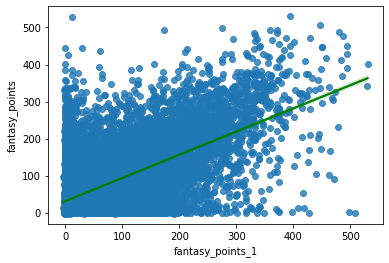

In [539]:
import seaborn as sns

sns.regplot(x="fantasy_points_1",
            y="fantasy_points",
            data=player_fantasy_year,
            line_kws={"color":"green"})
plt.show()

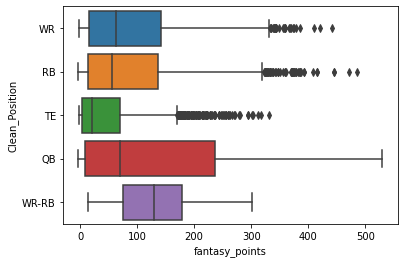

In [542]:
player_fantasy_year[["Clean_Position","fantasy_points"]].groupby("Clean_Position").agg(["std","max","min","median","mean","var"])

sns.boxplot(data=player_fantasy_year, x="fantasy_points", y="Clean_Position")

plt.show()

In [591]:
pos = player_fantasy_year["Clean_Position"].unique()
weight_list = []
for p in pos:
    q_25 = np.quantile(player_fantasy_year[player_fantasy_year["Clean_Position"]==p]["fantasy_points"],.25)
    q_75 = np.quantile(player_fantasy_year[player_fantasy_year["Clean_Position"]==p]["fantasy_points"],.75)
    q_50 = np.quantile(player_fantasy_year[player_fantasy_year["Clean_Position"]==p]["fantasy_points"],.5)
    max =  np.quantile(player_fantasy_year[player_fantasy_year["Clean_Position"]==p]["fantasy_points"],1)
    weight_list.append( (max-q_75)/max)

df = pd.DataFrame(zip(weight_list,pos),columns=["fall_off","pos"])
df

,fall_off,pos
0,0.68,WR
1,0.72,RB
2,0.79,TE
3,0.55,QB
4,0.40,WR-RB


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
conditions = ((player_fantasy_year["Year"] == 2022))

final_df = player_fantasy_year[conditions][["fantasy_points","player_id","Clean_Position","Player Name","Off. Snaps|Num","age_int"]]\
                        .sort_values("fantasy_points", ascending=False).merge(df, left_on="Clean_Position", right_on="pos").merge(age_point_reduce, on="Clean_Position", how="left")
final_df["weighted_points"] = final_df["fall_off"].values * final_df["fantasy_points"].values
final_df["points_per_snap"] = final_df["fantasy_points"]/final_df["Off. Snaps|Num"]
final_df["weighted_points_age"] = final_df[["weighted_points","percent_change","age_int","Clean_Position"]].apply(lambda x: weight_ages(x["weighted_points"], x["percent_change"], x["Clean_Position"], x["age_int"]),axis=1)


final_df.sort_values("weighted_points_age",ascending=False).drop("percent_change",axis=1)